In [32]:
import pandas as pd
import pickle
from scipy import stats
import pandas as pd
import seaborn as sns
import pingouin as pg
import statsmodels.formula.api as s
import statsmodels.api as sm
from statsmodels.formula.api import ols


In [33]:
final = pickle.load(open( '../00_data/final/competence_median.pkl','rb') )

In [34]:
final

,UserID,ability,interventiongroup,Geschlecht,Klassenstufe
0,186923,0.71318,6,m,9
1,360974,3.02098,2,w,10
2,373836,3.82202,2,w,6
3,435839,3.85933,control,w,8
4,452752,2.36261,5,w,8
...,...,...,...,...,...
11157,1063461,3.67466,6,m,11
11158,1063470,4.08917,2,w,11
11159,1063762,1.76604,NaN,NaN,NaN
11160,1063918,2.94580,6,w,13


In [35]:
intvcontrol = final[(final['interventiongroup']=='control')]
intv2 = final[(final['interventiongroup']=='2')]
intv3 = final[(final['interventiongroup']=='3')]
intv4 = final[(final['interventiongroup']=='4')]
intv5 = final[(final['interventiongroup']=='5')]
intv6 = final[(final['interventiongroup']=='6')]

Check assumptions

In [36]:
# Levenes homogeneity => homogeneity = not significant // significant = no homogeneity 
stats.levene(intvcontrol['ability'], intv2['ability'], intv3['ability'], intv4['ability'], intv5['ability'], intv6['ability'])

LeveneResult(statistic=23.49263861815274, pvalue=1.4499279206595225e-23)

In [37]:
# Shapiro-Wilk test for normality => normality = not significant // significant = no normality 
print(stats.shapiro(intvcontrol['ability']))
print(stats.shapiro(intv2['ability']))
print(stats.shapiro(intv3['ability']))
print(stats.shapiro(intv4['ability']))
print(stats.shapiro(intv5['ability']))
print(stats.shapiro(intv6['ability']))

ShapiroResult(statistic=0.9803478717803955, pvalue=1.424868401395466e-17)
ShapiroResult(statistic=0.9776461124420166, pvalue=6.902394724814449e-16)
ShapiroResult(statistic=0.9817327260971069, pvalue=1.3096205096394496e-14)
ShapiroResult(statistic=0.9858283400535583, pvalue=2.002659756777936e-12)
ShapiroResult(statistic=0.9688662886619568, pvalue=2.0863027400672112e-18)
ShapiroResult(statistic=0.9777210354804993, pvalue=2.2571992323481508e-15)


<AxesSubplot:xlabel='ability', ylabel='Count'>

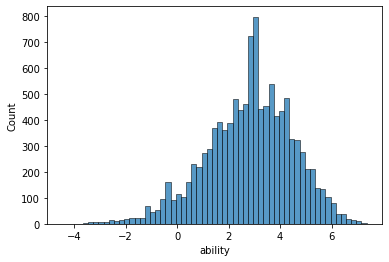

In [38]:
sns.histplot(data=final, x="ability")

In [39]:
# # Fit and summarize ols model
# model = ols('ability ~ C(interventiongroup)+C(Geschlecht)+C(interventiongroup):C(Geschlecht)',data=final).fit()
# # type-1 anova summary 
# table_type_1 = sm.stats.anova_lm(model, typ=1)

# # type-2 anova summary
# table_type_2 = sm.stats.anova_lm(model, typ=2)
# table_type_1

In [40]:
# aov = pg.anova(data=final, dv='ability', between=['interventiongroup'], detailed=True)
# print(aov)


Übersicht Effektgroeßen

In [41]:
ability_by_group = final.groupby(['interventiongroup']).agg({'ability':'median','Geschlecht':'count'})
ability_by_group = ability_by_group.rename(columns={'Geschlecht':'count'})
ability_by_group

,ability,count
interventiongroup,,
2,3.266220,1749
3,3.212050,1846
4,3.228310,1821
5,2.095320,1651
6,2.325225,1658
control,3.228310,2369


In [42]:
ability_by_group = final.groupby(['Geschlecht','interventiongroup']).agg({'ability':'median','Klassenstufe':'count'})
ability_by_group = ability_by_group.rename(columns={'Klassenstufe':'count'})

ability_by_group

ability  count
Geschlecht interventiongroup                 
d          2                  3.279480     47
           3                  2.772920     60
           4                  2.625960     53
           5                  1.910670     54
           6                  1.954840     68
           control            3.020980     73
m          2                  3.106430    812
           3                  3.121150    839
           4                  3.063805    890
           5                  1.988025    782
           6                  2.135640    793
           control            3.034840   1121
w          2                  3.445625    890
           3                  3.357890    947
           4                  3.417020    878
           5                  2.191450    815
           6                  2.505490    797
           control            3.398030   1175

In [43]:
ability_by_group = final.groupby(['Klassenstufe','interventiongroup']).agg({'ability':'median','Geschlecht':'count'})
ability_by_group = ability_by_group.rename(columns={'Geschlecht':'count'})

ability_by_group

ability  count
Klassenstufe interventiongroup                 
10           2                  3.927530    171
             3                  3.630920    181
             4                  3.754950    169
             5                  2.408395    156
             6                  2.666235    158
             control            3.861280    208
11           2                  3.381810    159
             3                  3.127850    169
             4                  3.475240    160
             5                  2.267020    143
             6                  2.557890    145
             control            3.550480    200
12           2                  4.175690     55
             3                  3.964390     49
             4                  4.150010     40
             5                  2.621030     53
             6                  2.952920     44
             control            4.183030     58
13           2                  4.301460     31
             3                  4.306520     24
             4                  4.345030     31
             5                  2.866270     26
             6                  3.412860     32
             control            4.041410     43
5            2                  2.682020    180
             3                  2.813820    181
             4                  2.877905    194
             5                  1.808990    149
             6                  1.622780    177
             control            2.600300    243
6            2                  3.034840    266
             3                  3.020980    267
             4                  3.020980    284
             5                  1.842755    240
             6                  1.830010    241
             control            2.961795    338
7            2                  3.048720    245
             3                  3.037170    274
             4                  3.074090    328
             5                  2.010185    292
             6                  2.174935    276
             control            3.034840    422
8            2                  3.230075    330
             3                  3.108850    378
             4                  3.234525    332
             5                  1.967660    290
             6                  2.271880    305
             control            3.261460    454
9            2                  3.659715    312
             3                  3.665940    323
             4                  3.368700    283
             5                  2.206820    302
             6                  2.543310    280
             control            3.535810    403

Alle Daten

In [44]:
# Kruskal Wallis Test 
stats.kruskal(intvcontrol['ability'], intv2['ability'], intv3['ability'],intv4['ability'],intv5['ability'],intv6['ability'])


KruskalResult(statistic=1184.270761868424, pvalue=7.498364185040477e-254)

In [45]:
#Wilcoxon Mann Whitney Test
print(stats.mannwhitneyu(intvcontrol['ability'], intv2['ability']))
print(stats.mannwhitneyu(intvcontrol['ability'], intv3['ability']))
print(stats.mannwhitneyu(intvcontrol['ability'], intv4['ability']))
print(stats.mannwhitneyu(intvcontrol['ability'], intv5['ability']))
print(stats.mannwhitneyu(intvcontrol['ability'], intv6['ability']))


MannwhitneyuResult(statistic=2009290.0, pvalue=0.09799546292617765)
MannwhitneyuResult(statistic=2169540.0, pvalue=0.6636404970222112)
MannwhitneyuResult(statistic=2158078.0, pvalue=0.9773297369239538)
MannwhitneyuResult(statistic=2846577.5, pvalue=9.599320875322535e-134)
MannwhitneyuResult(statistic=2677560.5, pvalue=5.279607555115256e-86)


<AxesSubplot:xlabel='ability', ylabel='interventiongroup'>

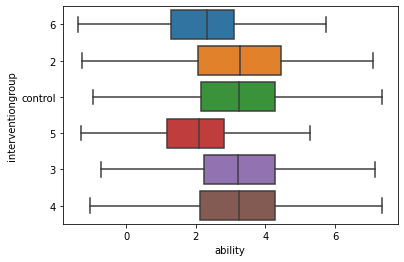

In [46]:
sns.boxplot(data=final, x="ability", y="interventiongroup",showfliers = False)#,hue='Geschlecht'


<AxesSubplot:xlabel='ability', ylabel='Geschlecht'>

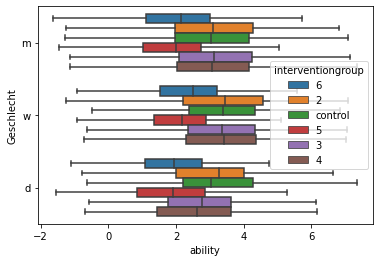

In [47]:
sns.boxplot(data=final, x="ability", hue="interventiongroup",y='Geschlecht',showfliers = False)


Gender Demographics

In [48]:
final_m = final.loc[final.Geschlecht == 'm']
final_w = final.loc[final.Geschlecht == 'w']
final_d = final.loc[final.Geschlecht == 'd']

Jungen

In [49]:
intvcontrol_m = final_m[(final_m['interventiongroup']=='control')]
intv2_m = final_m[(final_m['interventiongroup']=='2')]
intv3_m = final_m[(final_m['interventiongroup']=='3')]
intv4_m = final_m[(final_m['interventiongroup']=='4')]
intv5_m = final_m[(final_m['interventiongroup']=='5')]
intv6_m = final_m[(final_m['interventiongroup']=='6')]

# Kruskal Wallis Test 
stats.kruskal(intvcontrol_m['ability'], intv2_m['ability'], intv3_m['ability'],intv4_m['ability'],intv5_m['ability'],intv6_m['ability'])



KruskalResult(statistic=574.3137474739618, pvalue=7.164131196197928e-122)

In [50]:
#Wilcoxon Mann Whitney Test
print(stats.mannwhitneyu(intvcontrol_m['ability'], intv2_m['ability']))
print(stats.mannwhitneyu(intvcontrol_m['ability'], intv3_m['ability']))
print(stats.mannwhitneyu(intvcontrol_m['ability'], intv4_m['ability']))
print(stats.mannwhitneyu(intvcontrol_m['ability'], intv5_m['ability']))
print(stats.mannwhitneyu(intvcontrol_m['ability'], intv6_m['ability']))


MannwhitneyuResult(statistic=441580.0, pvalue=0.2634117623736123)
MannwhitneyuResult(statistic=459071.5, pvalue=0.36683496483474975)
MannwhitneyuResult(statistic=493465.5, pvalue=0.6774843775996793)
MannwhitneyuResult(statistic=634677.5, pvalue=3.0138539216496595e-62)
MannwhitneyuResult(statistic=605120.0, pvalue=1.8523432561004733e-41)


<AxesSubplot:xlabel='ability', ylabel='interventiongroup'>

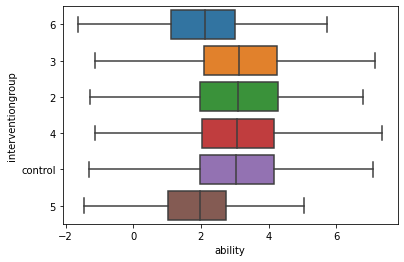

In [51]:
sns.boxplot(data=final_m, x="ability", y="interventiongroup",showfliers = False)


Maedchen

In [52]:
intvcontrol_w = final_w[(final_w['interventiongroup']=='control')]
intv2_w = final_w[(final_w['interventiongroup']=='2')]
intv3_w = final_w[(final_w['interventiongroup']=='3')]
intv4_w = final_w[(final_w['interventiongroup']=='4')]
intv5_w = final_w[(final_w['interventiongroup']=='5')]
intv6_w = final_w[(final_w['interventiongroup']=='6')]

# Kruskal Wallis Test 
stats.kruskal(intvcontrol_w['ability'], intv2_w['ability'], intv3_w['ability'],intv4_w['ability'],intv5_w['ability'],intv6_w['ability'])


KruskalResult(statistic=588.3338152246519, pvalue=6.705056331641548e-125)

In [53]:
#Wilcoxon Mann Whitney Test
print(stats.mannwhitneyu(intvcontrol_w['ability'], intv2_w['ability']))
print(stats.mannwhitneyu(intvcontrol_w['ability'], intv3_w['ability']))
print(stats.mannwhitneyu(intvcontrol_w['ability'], intv4_w['ability']))
print(stats.mannwhitneyu(intvcontrol_w['ability'], intv5_w['ability']))
print(stats.mannwhitneyu(intvcontrol_w['ability'], intv6_w['ability']))


MannwhitneyuResult(statistic=506296.0, pvalue=0.21662638878013507)
MannwhitneyuResult(statistic=555312.0, pvalue=0.9403446851040009)
MannwhitneyuResult(statistic=514188.5, pvalue=0.902015936238272)
MannwhitneyuResult(statistic=702248.0, pvalue=2.6429873723011693e-70)
MannwhitneyuResult(statistic=638059.5, pvalue=1.2326292711936941e-42)


<AxesSubplot:xlabel='ability', ylabel='interventiongroup'>

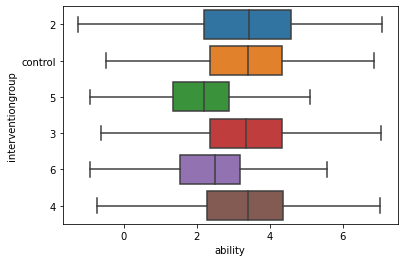

In [54]:
sns.boxplot(data=final_w, x="ability", y="interventiongroup",showfliers = False)

Divers

In [55]:
intvcontrol_d = final_d[(final_d['interventiongroup']=='control')]
intv2_d = final_d[(final_d['interventiongroup']=='2')]
intv3_d = final_d[(final_d['interventiongroup']=='3')]
intv4_d = final_d[(final_d['interventiongroup']=='4')]
intv5_d = final_d[(final_d['interventiongroup']=='5')]
intv6_d = final_d[(final_d['interventiongroup']=='6')]

# Kruskal Wallis Test 
stats.kruskal(intvcontrol_d['ability'], intv2_d['ability'], intv3_d['ability'],intv4_d['ability'],intv5_d['ability'],intv6_d['ability'])


KruskalResult(statistic=31.936274477727135, pvalue=6.116406171322492e-06)

In [56]:
#Wilcoxon Mann Whitney Test
print(stats.mannwhitneyu(intvcontrol_d['ability'], intv2_d['ability']))
print(stats.mannwhitneyu(intvcontrol_d['ability'], intv3_d['ability']))
print(stats.mannwhitneyu(intvcontrol_d['ability'], intv4_d['ability']))
print(stats.mannwhitneyu(intvcontrol_d['ability'], intv5_d['ability']))
print(stats.mannwhitneyu(intvcontrol_d['ability'], intv6_d['ability']))


MannwhitneyuResult(statistic=1693.5, pvalue=0.9079713390020716)
MannwhitneyuResult(statistic=2567.0, pvalue=0.08865430305334551)
MannwhitneyuResult(statistic=2305.0, pvalue=0.06746216816869736)
MannwhitneyuResult(statistic=2819.0, pvalue=3.577139267749713e-05)
MannwhitneyuResult(statistic=3515.0, pvalue=2.0415717081372058e-05)


<AxesSubplot:xlabel='ability', ylabel='interventiongroup'>

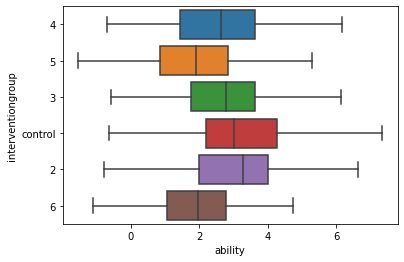

In [57]:
sns.boxplot(data=final_d, x="ability", y="interventiongroup",showfliers = False)

Demographics Klassenstufe